In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from matplotlib.gridspec import GridSpec
from llm_deliberation.utils import bootstrap_statistic_df, jaccard
from scipy.stats import mannwhitneyu

from pyprojroot import here
from mpl_lego.labels import bold_text, add_significance_bracket_inplot, apply_subplot_labels
from mpl_lego.style import use_latex_style

In [2]:
use_latex_style()

In [3]:
with open(here('data/analysis/exp1_sync_h2h.pkl'), 'rb') as file:
    exp1 = pickle.load(file)

with open(here('data/analysis/exp5_sync_h2h.pkl'), 'rb') as file:
    exp2 = pickle.load(file)

with open(here('data/analysis/exp6_sync_h2h.pkl'), 'rb') as file:
    exp3 = pickle.load(file)

In [4]:
exp1_expl = exp1.explode(['Agent_1_verdicts', 'Agent_2_verdicts', 'Agent_1_values', 'Agent_2_values']).reset_index()
exp2_expl = exp2.explode(['Agent_1_verdicts', 'Agent_2_verdicts', 'Agent_1_values', 'Agent_2_values']).reset_index()
exp3_expl = exp3.explode(['Agent_1_verdicts', 'Agent_2_verdicts', 'Agent_1_values', 'Agent_2_values']).reset_index()

In [5]:
exp1_agree_mask = exp1_expl['Agent_1_verdicts'] == exp1_expl['Agent_2_verdicts']
exp1_disagree_mask = exp1_expl['Agent_1_verdicts'] != exp1_expl['Agent_2_verdicts']

exp1_agree_sim = bootstrap_statistic_df(
    df=exp1_expl[exp1_agree_mask],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp1_disagree_sim = bootstrap_statistic_df(
    df=exp1_expl[exp1_disagree_mask],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

In [6]:
mannwhitneyu(
    exp1_expl[exp1_agree_mask].apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1),
    exp1_expl[exp1_disagree_mask].apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1))

MannwhitneyuResult(statistic=np.float64(454628.0), pvalue=np.float64(2.691385035682935e-53))

In [7]:
exp1_initial_disagreement_consensus = (exp1['n_rounds'] > 1) & (~exp1['final_verdict'].isna())
exp1_initial_disagreement_no_consensus = (exp1['n_rounds'] > 1) & (exp1['final_verdict'].isna())

exp1_sim_consensus_beginning = bootstrap_statistic_df(
    df=exp1[exp1_initial_disagreement_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp1_sim_consensus_end = bootstrap_statistic_df(
    df=exp1[exp1_initial_disagreement_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp1_sim_no_consensus_beginning = bootstrap_statistic_df(
    df=exp1[exp1_initial_disagreement_no_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp1_sim_no_consensus_end = bootstrap_statistic_df(
    df=exp1[exp1_initial_disagreement_no_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

In [8]:
mannwhitneyu(
    exp1[exp1_initial_disagreement_consensus].apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1),
    exp1[exp1_initial_disagreement_consensus].apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1))

MannwhitneyuResult(statistic=np.float64(20191.0), pvalue=np.float64(2.234574273160997e-10))

In [9]:
mannwhitneyu(
    exp1[exp1_initial_disagreement_no_consensus].apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1),
    exp1[exp1_initial_disagreement_no_consensus].apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1))

MannwhitneyuResult(statistic=np.float64(4096.5), pvalue=np.float64(0.3840205545226345))

In [10]:
exp2_agree_mask = exp2_expl['Agent_1_verdicts'] == exp2_expl['Agent_2_verdicts']
exp2_disagree_mask = exp2_expl['Agent_1_verdicts'] != exp2_expl['Agent_2_verdicts']

exp2_agree_sim = bootstrap_statistic_df(
    df=exp2_expl[exp2_agree_mask],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp2_disagree_sim = bootstrap_statistic_df(
    df=exp2_expl[exp2_disagree_mask],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

In [11]:
mannwhitneyu(
    exp2_expl[exp2_agree_mask].apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1),
    exp2_expl[exp2_disagree_mask].apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1))

MannwhitneyuResult(statistic=np.float64(726917.0), pvalue=np.float64(2.9319909871797824e-57))

In [12]:
exp2_initial_disagreement_consensus = (exp2['n_rounds'] > 1) & (~exp2['final_verdict'].isna())
exp2_initial_disagreement_no_consensus = (exp2['n_rounds'] > 1) & (exp2['final_verdict'].isna())

exp2_sim_consensus_beginning = bootstrap_statistic_df(
    df=exp2[exp2_initial_disagreement_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp2_sim_consensus_end = bootstrap_statistic_df(
    df=exp2[exp2_initial_disagreement_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp2_sim_no_consensus_beginning = bootstrap_statistic_df(
    df=exp2[exp2_initial_disagreement_no_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp2_sim_no_consensus_end = bootstrap_statistic_df(
    df=exp2[exp2_initial_disagreement_no_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

In [13]:
mannwhitneyu(
    exp2[exp2_initial_disagreement_consensus].apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1),
    exp2[exp2_initial_disagreement_consensus].apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1))

MannwhitneyuResult(statistic=np.float64(39263.0), pvalue=np.float64(8.466046395667788e-30))

In [14]:
mannwhitneyu(
    exp2[exp2_initial_disagreement_no_consensus].apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1),
    exp2[exp2_initial_disagreement_no_consensus].apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1))

MannwhitneyuResult(statistic=np.float64(5889.0), pvalue=np.float64(0.1502184620450732))

In [15]:
exp3_agree_mask = exp3_expl['Agent_1_verdicts'] == exp3_expl['Agent_2_verdicts']
exp3_disagree_mask = exp3_expl['Agent_1_verdicts'] != exp3_expl['Agent_2_verdicts']

exp3_agree_sim = bootstrap_statistic_df(
    df=exp3_expl[exp3_agree_mask],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp3_disagree_sim = bootstrap_statistic_df(
    df=exp3_expl[exp3_disagree_mask],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

In [16]:
mannwhitneyu(
    exp3_expl[exp3_agree_mask].apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1),
    exp3_expl[exp3_disagree_mask].apply(lambda x: jaccard(x['Agent_1_values'], x['Agent_2_values']), axis=1))

MannwhitneyuResult(statistic=np.float64(732807.0), pvalue=np.float64(9.641832082677064e-63))

In [17]:
exp3_initial_disagreement_consensus = (exp3['n_rounds'] > 1) & (~exp3['final_verdict'].isna())
exp3_initial_disagreement_no_consensus = (exp3['n_rounds'] > 1) & (exp3['final_verdict'].isna())

exp3_sim_consensus_beginning = bootstrap_statistic_df(
    df=exp3[exp3_initial_disagreement_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp3_sim_consensus_end = bootstrap_statistic_df(
    df=exp3[exp3_initial_disagreement_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp3_sim_no_consensus_beginning = bootstrap_statistic_df(
    df=exp3[exp3_initial_disagreement_no_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

exp3_sim_no_consensus_end = bootstrap_statistic_df(
    df=exp3[exp3_initial_disagreement_no_consensus],
    statistic_func=lambda df: df.apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1).mean(),
    n_bootstrap=1000,
    confidence_level=0.95,
    random_state=2332)

In [27]:
print((exp1_sim_consensus_end['original'] - exp1_sim_consensus_beginning['original']) / exp1_sim_consensus_beginning['original'] * 100)
print((exp1_sim_no_consensus_end['original'] - exp1_sim_no_consensus_beginning['original']) / exp1_sim_no_consensus_beginning['original'] * 100)

31.129694945780667
6.290432162585293


In [28]:
print((exp1_sim_consensus_end['original'] - exp1_sim_consensus_beginning['original']) / exp1_sim_consensus_beginning['original'] * 100)
print((exp1_sim_no_consensus_end['original'] - exp1_sim_no_consensus_beginning['original']) / exp1_sim_no_consensus_beginning['original'] * 100)

31.129694945780667
6.290432162585293


In [26]:
print((exp3_sim_consensus_end['original'] - exp3_sim_consensus_beginning['original']) / exp3_sim_consensus_beginning['original'] * 100)
print((exp3_sim_no_consensus_end['original'] - exp3_sim_no_consensus_beginning['original']) / exp3_sim_no_consensus_beginning['original'] * 100)

52.45485636796923
17.86328610489684


In [18]:
mannwhitneyu(
    exp3[exp3_initial_disagreement_consensus].apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1),
    exp3[exp3_initial_disagreement_consensus].apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1))

MannwhitneyuResult(statistic=np.float64(24316.5), pvalue=np.float64(1.1386039099732248e-18))

In [19]:
mannwhitneyu(
    exp3[exp3_initial_disagreement_no_consensus].apply(lambda x: jaccard(x['Agent_1_values'][0], x['Agent_2_values'][0]), axis=1),
    exp3[exp3_initial_disagreement_no_consensus].apply(lambda x: jaccard(x['Agent_1_values'][-1], x['Agent_2_values'][-1]), axis=1))

MannwhitneyuResult(statistic=np.float64(12994.0), pvalue=np.float64(0.02173066671682096))

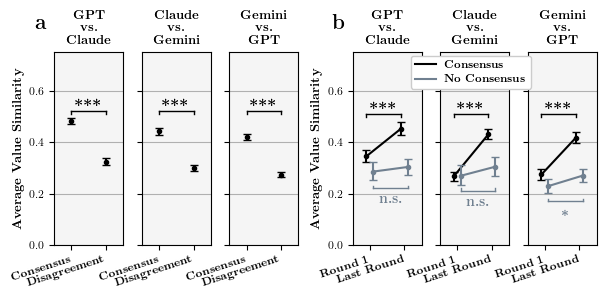

In [31]:
fig = plt.figure(figsize=(7, 2.5))

gs = GridSpec(1, 7, figure=fig,
              width_ratios=[1, 1, 1, 0.25, 1, 1, 1],
              wspace=0.3)

axes = [fig.add_subplot(gs[0, 0])]
axes = axes + [fig.add_subplot(gs[0, idx], sharey=axes[0]) for idx in (1, 2, 4, 5, 6)]

COLORS = ['C2', 'C3', 'C4']
exp_agrees = [exp1_agree_sim, exp2_agree_sim, exp3_agree_sim]
exp_disagrees = [exp1_disagree_sim, exp2_disagree_sim, exp3_disagree_sim]

for idx, (agree, disagree) in enumerate(zip(exp_agrees, exp_disagrees)):
   axes[idx].errorbar(
      x=[0, 1],
      y=[agree['original'], disagree['original']],
      yerr=[[agree['lower_err'], disagree['lower_err']],
            [agree['upper_err'], disagree['upper_err']]],
      fmt='o',
      markersize=3,
      capsize=3,
      color='black')
   axes[idx].set_ylim([0, 0.75])
   axes[idx].set_xlim([-0.5, 1.5])
   axes[idx].set_xticks([0, 1])
   axes[idx].set_xticklabels(bold_text(['Consensus', 'Disagreement']), ha='right', rotation=18, fontsize=8)
   axes[idx].grid(axis='y')
   axes[idx].set_axisbelow(True)
   axes[idx].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
   add_significance_bracket_inplot(
      ax=axes[idx],
      x1=0,
      x2=1,
      y=0.51,
      h=0.01,
      label=bold_text('***'))


axes[0].set_title(bold_text('GPT\nvs.\nClaude'), fontsize=9)
axes[1].set_title(bold_text('Claude\nvs.\nGemini'), fontsize=9)
axes[2].set_title(bold_text('Gemini\nvs.\nGPT'), fontsize=9)

for ax in axes[1:]:
    ax.tick_params(axis="y", labelleft=False)

axes[0].tick_params(axis="y", labelleft=True, labelsize=8)
axes[3].tick_params(axis="y", labelleft=True, labelsize=8)
axes[0].set_ylabel(bold_text('Average Value Similarity'), fontsize=9)
axes[3].set_ylabel(bold_text('Average Value Similarity'), fontsize=9)


exps_beginning_consensus = [exp1_sim_consensus_beginning, exp2_sim_consensus_beginning, exp3_sim_consensus_beginning]
exps_end_consensus = [exp1_sim_consensus_end, exp2_sim_consensus_end, exp3_sim_consensus_end]
exps_beginning_no_consensus = [exp1_sim_no_consensus_beginning, exp2_sim_no_consensus_beginning, exp3_sim_no_consensus_beginning]
exps_end_no_consensus = [exp1_sim_no_consensus_end, exp2_sim_no_consensus_end, exp3_sim_no_consensus_end]

SHIFT = 0.1
for idx, (beginning_consensus, end_consensus, ax) in enumerate(zip(exps_beginning_consensus, exps_end_consensus, axes[3:])):
   ax.errorbar(
      x=[0 - SHIFT, 1 - SHIFT],
      y=[beginning_consensus['original'], end_consensus['original']],
      yerr=[[beginning_consensus['lower_err'], end_consensus['lower_err']],
            [beginning_consensus['upper_err'], end_consensus['upper_err']]],
      fmt='o-',
      markersize=3,
      capsize=3,
      color='black')

for idx, (beginning_no_consensus, end_no_consensus, ax) in enumerate(zip(exps_beginning_no_consensus, exps_end_no_consensus, axes[3:])):
   ax.errorbar(
      x=[0 + SHIFT, 1 + SHIFT],
      y=[beginning_no_consensus['original'], end_no_consensus['original']],
      yerr=[[beginning_no_consensus['lower_err'], end_no_consensus['lower_err']],
            [beginning_no_consensus['upper_err'], end_no_consensus['upper_err']]],
      fmt='o-',
      markersize=3,
      capsize=3,
      zorder=10 + idx,
      color='slategray')
   ax.set_ylim([0, 0.75])
   ax.set_xlim([-0.5, 1.5])
   ax.set_xticks([0, 1])
   ax.set_xticklabels(bold_text(['Round 1', 'Last Round']), ha='right', rotation=18, fontsize=8)
   ax.grid(axis='y')
   ax.set_axisbelow(True)
   ax.set_yticks([0, 0.2, 0.4, 0.6])
   add_significance_bracket_inplot(
      ax=ax,
      x1=-SHIFT,
      x2=1-SHIFT,
      y=0.50,
      h=0.01,
      label=bold_text('***'))

add_significance_bracket_inplot(
   ax=axes[3],
   x1=SHIFT,
   x2=1 + SHIFT,
   y=0.23,
   direction='down',
   color='slategray',
   h=0.01,
   text_offset=0.02,
   fontsize=10,
   label=bold_text('n.s.'))
add_significance_bracket_inplot(
   ax=axes[4],
   x1=SHIFT,
   x2=1 + SHIFT,
   y=0.22,
   direction='down',
   color='slategray',
   h=0.01,
   text_offset=0.02,
   fontsize=10,
   label=bold_text('n.s.'))
add_significance_bracket_inplot(
   ax=axes[5],
   x1=SHIFT,
   x2=1 + SHIFT,
   y=0.18,
   direction='down',
   color='slategray',
   h=0.01,
   text_offset=0.02,
   fontsize=10,
   label=bold_text('*'))
axes[4].plot([], [], color='black', label=bold_text('Consensus'))
axes[4].plot([], [], color='slategray', label=bold_text('No Consensus'))
fig.legend(loc='center', bbox_to_anchor=(0.72, 0.80), framealpha=1, prop={'size': 7.5})
axes[3].set_title(bold_text('GPT\nvs.\nClaude'), fontsize=9)
axes[4].set_title(bold_text('Claude\nvs.\nGemini'), fontsize=9)
axes[5].set_title(bold_text('Gemini\nvs.\nGPT'), fontsize=9)

for ax in axes:
   ax.set_facecolor(color='0.96')

apply_subplot_labels([axes[0], axes[3]], bold=True, x=-0.2, y=1.15)
plt.savefig('figure_value_similarity.pdf', bbox_inches='tight')